# Building TensorFlow dataset in a tensor

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]

ds = tf.data.Dataset.from_tensor_slices(a)

print(ds)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.float32, name=None)>


In [ ]:
for item in ds:
  print(item)

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [ ]:
ds_batch = ds.batch(3)

for i, elem in enumerate(ds_batch, 100):
  print('batch {}:'.format(i), elem.numpy())

batch 100: [1.2 3.4 7.5]
batch 101: [4.1 5.  1. ]


In [ ]:
tf.random.set_seed(1)

t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [ ]:
#queremos asociar cada muestra con su etiqueta
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip ((ds_x, ds_y))

for example in ds_joint:
  print('x: ', example[0].numpy(),
        'y: ', example[1].numpy())

x:  [0.16513085 0.9014813  0.6309742 ] y:  0
x:  [0.4345461  0.29193902 0.64250207] y:  1
x:  [0.9757855  0.43509948 0.6601019 ] y:  2
x:  [0.60489583 0.6366315  0.6144488 ] y:  3


In [ ]:
ds_joint = tf.data.Dataset.from_tensor_slices((t_x, t_y))

for example in ds_joint:
  print(' x: ', example[0].numpy(),
        ' y: ', example[1].numpy())

 x:  [0.16513085 0.9014813  0.6309742 ]  y:  0
 x:  [0.4345461  0.29193902 0.64250207]  y:  1
 x:  [0.9757855  0.43509948 0.6601019 ]  y:  2
 x:  [0.60489583 0.6366315  0.6144488 ]  y:  3


In [ ]:
ds_trans = ds_joint.map(lambda x, y: (x*2-1.0, y))

for example in ds_trans:
  print(' x:', example[0].numpy(),
        ' y:', example[1].numpy())

 x: [-0.6697383   0.80296254  0.26194835]  y: 0
 x: [-0.13090777 -0.41612196  0.28500414]  y: 1
 x: [ 0.951571   -0.12980103  0.32020378]  y: 2
 x: [0.20979166 0.27326298 0.22889757]  y: 3


In [ ]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))

for example in ds:
  print(' x: ', example[0].numpy(),
        ' y:', example[1].numpy())

 x:  [0.9757855  0.43509948 0.6601019 ]  y: 2
 x:  [0.4345461  0.29193902 0.64250207]  y: 1
 x:  [0.16513085 0.9014813  0.6309742 ]  y: 0
 x:  [0.60489583 0.6366315  0.6144488 ]  y: 3


In [ ]:
ds = ds_joint.batch(batch_size=3,
                    drop_remainder=False)
batch_x, batch_y =next(iter(ds))
print('batchx: \n', batch_x.numpy())
print('batch y: ', batch_y.numpy())

batchx: 
 [[0.16513085 0.9014813  0.6309742 ]
 [0.4345461  0.29193902 0.64250207]
 [0.9757855  0.43509948 0.6601019 ]]
batch y:  [0 1 2]


In [ ]:
ds = ds_joint.batch(3).repeat(count=2)

for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [ ]:
ds = ds_joint.repeat(count=2).batch(3)
for i,(batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (3, 3) [0 1 2]
1 (3, 3) [3 0 1]
2 (2, 3) [2 3]


In [ ]:
tf.random.set_seed(1)

#Step1: shuffle --> batch --> repeat
ds = ds_joint.shuffle(4).batch(2).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [ ]:
tf.random.set_seed(1)

#Step1: shuffle --> batch --> repeat
ds= ds_joint.shuffle(4).batch(2).repeat(20)

for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]
6 (2, 3) [1 3]
7 (2, 3) [2 0]
8 (2, 3) [1 2]
9 (2, 3) [3 0]
10 (2, 3) [3 0]
11 (2, 3) [2 1]
12 (2, 3) [3 0]
13 (2, 3) [1 2]
14 (2, 3) [3 0]
15 (2, 3) [2 1]
16 (2, 3) [2 3]
17 (2, 3) [0 1]
18 (2, 3) [1 2]
19 (2, 3) [0 3]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [3 2]
23 (2, 3) [0 1]
24 (2, 3) [3 0]
25 (2, 3) [1 2]
26 (2, 3) [1 3]
27 (2, 3) [2 0]
28 (2, 3) [2 1]
29 (2, 3) [0 3]
30 (2, 3) [2 3]
31 (2, 3) [0 1]
32 (2, 3) [3 1]
33 (2, 3) [2 0]
34 (2, 3) [3 2]
35 (2, 3) [1 0]
36 (2, 3) [3 0]
37 (2, 3) [2 1]
38 (2, 3) [0 2]
39 (2, 3) [3 1]


In [ ]:
tf.random.set_seed(1)

#Step2: batch --> shuffle --> repeat
ds= ds_joint.batch(2).shuffle(4).repeat(3)

for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


In [ ]:
tf.random.set_seed(1)

#Step2: batch --> shuffle --> repeat
ds= ds_joint.batch(2).shuffle(4).repeat(20)

for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]
6 (2, 3) [2 3]
7 (2, 3) [0 1]
8 (2, 3) [2 3]
9 (2, 3) [0 1]
10 (2, 3) [2 3]
11 (2, 3) [0 1]
12 (2, 3) [2 3]
13 (2, 3) [0 1]
14 (2, 3) [2 3]
15 (2, 3) [0 1]
16 (2, 3) [0 1]
17 (2, 3) [2 3]
18 (2, 3) [2 3]
19 (2, 3) [0 1]
20 (2, 3) [0 1]
21 (2, 3) [2 3]
22 (2, 3) [2 3]
23 (2, 3) [0 1]
24 (2, 3) [2 3]
25 (2, 3) [0 1]
26 (2, 3) [2 3]
27 (2, 3) [0 1]
28 (2, 3) [0 1]
29 (2, 3) [2 3]
30 (2, 3) [0 1]
31 (2, 3) [2 3]
32 (2, 3) [2 3]
33 (2, 3) [0 1]
34 (2, 3) [2 3]
35 (2, 3) [0 1]
36 (2, 3) [2 3]
37 (2, 3) [0 1]
38 (2, 3) [0 1]
39 (2, 3) [2 3]


In [ ]:
tf.random.set_seed(1)

#Step3: batch --> repeat --> shuffle
ds= ds_joint.batch(2).repeat(4).shuffle(4)

for i, (batch_x, batch_y) in enumerate(ds):
  print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [0 1]
2 (2, 3) [2 3]
3 (2, 3) [0 1]
4 (2, 3) [2 3]
5 (2, 3) [2 3]
6 (2, 3) [2 3]
7 (2, 3) [0 1]


# Building dataset from a file stored in a local drive

In [ ]:
import pathlib

imgdir_path = pathlib.Path('.')

file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(file_list)

['cat-01.jpg', 'cat-02.jpg', 'cat-03.jpg', 'dog-01.jpg', 'dog-02.jpg', 'dog-03.jpg']


 Image Size:  (280, 300, 3)
 Image Size:  (396, 312, 3)
 Image Size:  (414, 500, 3)
 Image Size:  (499, 327, 3)
 Image Size:  (199, 187, 3)
 Image Size:  (375, 499, 3)


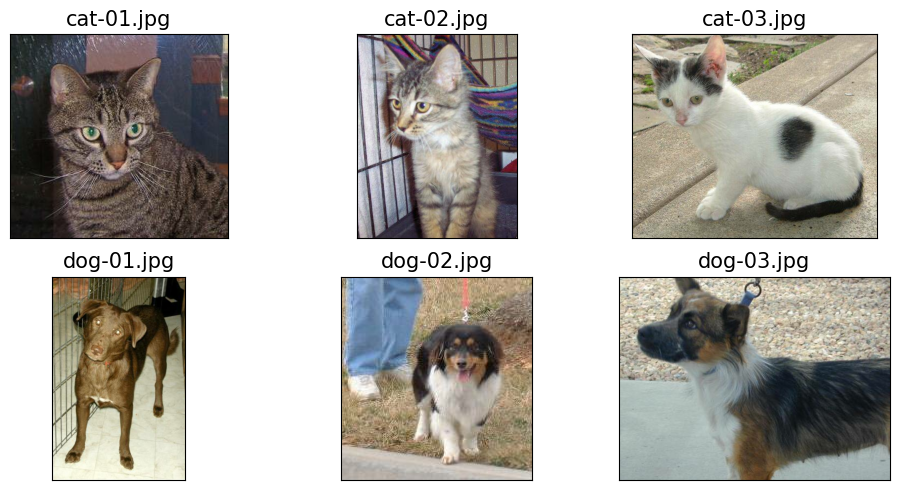

In [ ]:
import matplotlib.pyplot as plt
import os

fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
  img_raw = tf.io.read_file(file)
  img = tf.image.decode_image(img_raw)
  print(' Image Size: ', img.shape)
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(img)
  ax.set_title(os.path.basename(file), size=15)

#plt.savefig(' images/13_1.png', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [ ]:
ds_files_labels = tf.data.Dataset.from_tensor_slices(
    (file_list, labels))

for item in ds_files_labels:
  print(item[0].numpy(), item[1].numpy())


b'cat-01.jpg' 0
b'cat-02.jpg' 0
b'cat-03.jpg' 0
b'dog-01.jpg' 1
b'dog-02.jpg' 1
b'dog-03.jpg' 1


(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


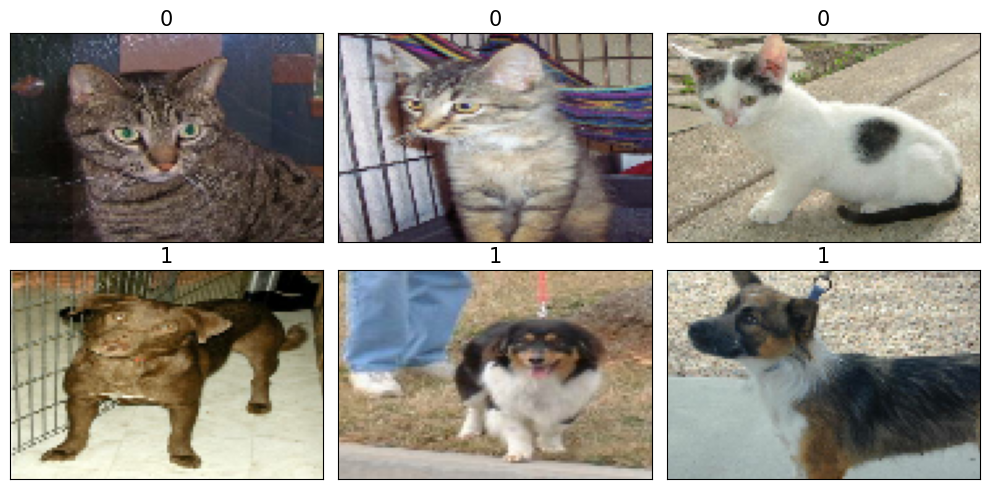

In [ ]:
def load_and_preprocess(path, label):
  image = tf.io.read_file(path)
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [img_height, img_width])
  image /= 255.0

  return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i, example in enumerate(ds_images_labels):
  print(example[0].shape, example[1].numpy())
  ax = fig.add_subplot(2, 3, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(example[0])
  ax.set_title('{}'. format(example[1].numpy()), size=15)

plt.tight_layout()

plt.show()

In [ ]:
#116
#!pip install --upgrade tensorflow-datasets

In [ ]:
import tensorflow_datasets as tfds

print(len(tfds.list_builders()))
print(tfds.list_builders()[:5])

1143
['abstract_reasoning', 'accentdb', 'aeslc', 'aflw2k3d', 'ag_news_subset']


In [ ]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'answer_equivalence',
 'arc',
 'asqa',
 'asset',
 'assin2',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'bee_dataset',
 'beir',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'ble_wind_field',
 'blimp',
 'booksum',
 'bool_q',
 'bucc',
 'c4',
 'c4_wsrs',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cardiotox',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar100_n',
 'cifar10_1',
 'cifar10_corrupted',
 'cifar10_n',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'conll2002',
 'conll2003',
 'controlled_noisy_web_labels'

In [ ]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)
print('\n', 30*"=, '\n")
print(celeba_bldr.info.features.keys())
print('\n', 30*"=, '\n")
print(celeba_bldr.info.features['image'])
print('\n', 30*"=, '\n")
print(celeba_bldr.info.features['attributes'].keys())
print('\n', 30*"=, '\n")
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': bool,
        'Arched_Eyebrows': bool,
        'Attractive': bool,
        'Bags_Under_Eyes': bool,
        'Bald': bool,
        'Bangs': bool,
        'Big_Lips': bool,
        'Big_Nose': bool,
        'Black_Hair': bool,
        'Blond_Hair': bool,
        'Blurry': bool,
        'Brown_Hair': bool,
        'Bushy_Eyebrows': bool,
        'Chubby': bool,
        'Double_Chin': bool,
        'Eyeglasses': bool,
        'Goatee': bool,
        'Gray_Hair': bool,
        'Heavy_Makeup': bool,
        'High_Cheekbones': bool,
        'Male': bool,
        'Mouth_Slightly_Open': bool,
        'Mustache': bool,
        'Narrow_Eyes': bool,
        'No_Beard': bool,
        'Oval_Face': bool,
        'Pale_Skin': bool,
        'Pointy_Nose': bool,
        'Receding_Hairline': bool,
        'Rosy_Cheeks': bool,
        'Sideburns': bool,
        'Smiling': bool,
        'Straight_Hair': bool,
        'Wavy_Hair': b

In [ ]:
celeba_bldr.download_and_prepare()

In [ ]:
datasets = celeba_bldr.as_dataset(shuffle_files=False)

datasets.keys()

In [ ]:
ds_train = datasets['train']
assert isinstance(ds_train, tf.data.Dataset)

example = next(iter(ds_train))
print(type(example))
print(example.keys())

In [ ]:
ds_train.map(lambda item:
      (item['image'], tf.cast(item['attributes']['Male'], tf.int32)))

In [ ]:
ds_train = ds_train.batch(18)
images, labels = next(iter(ds_train))

print(images.shape, labels)

In [ ]:
fig = plt.figure(figsize=(12, 8))
for i, (image, label) in enumerate(zip(images, labels)):
  ax = fig.add_subplot(3, 6, i+1)
  ax.set_xticks([]); ax.set_yticks([])
  ax.imshow(image)
  ax.set_title('{}'.format(label), size=15)

#plt.savefig(' images/13_3.png', dpi=300)
plt.show()

In [ ]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)

print(mnist_info)

print(mnist.keys())

In [ ]:
ds_train = mnist['train']

assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item:
 (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))
print(batch[0].shape, batch[1])

fig = plt.figure(figsize=(15, 6))
for i, (image, label) in enumerate(zip(batch[0], batch[1])):
  ax = fig.add_subplot(2, 5, i+1)
  ax.set_xticks([])
  ax.set_ysticks([])
  ax.imshow(image[:, :, 0], camp='gray_r')
  ax.set_title('{}'.format(label), size=15)

plt.show()


In [ ]:
#continuación porque la otra no va
cifar = tfds.builder("cifar10")

print(cifar.info.features)

FeaturesDict({
    'id': Text(shape=(), dtype=string),
    'image': Image(shape=(32, 32, 3), dtype=uint8),
    'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
})


In [ ]:
cifar.download_and_prepare()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteGPXRJE/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteGPXRJE/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
dataset = cifar.as_dataset(shuffle_files = False)

dataset.keys()

dict_keys([Split('train'), Split('test')])

In [ ]:
ds_train = dataset["train"]

ds_train1 = ds_train.batch(18)

example = next(iter(ds_train1))

print(type(example))
print(example.keys())

<class 'dict'>
dict_keys(['id', 'image', 'label'])


(32, 32, 3) 7
(32, 32, 3) 8
(32, 32, 3) 4
(32, 32, 3) 4
(32, 32, 3) 6
(32, 32, 3) 5
(32, 32, 3) 2
(32, 32, 3) 9
(32, 32, 3) 6
(32, 32, 3) 6
(32, 32, 3) 9
(32, 32, 3) 9
(32, 32, 3) 3
(32, 32, 3) 0
(32, 32, 3) 8
(32, 32, 3) 7
(32, 32, 3) 9
(32, 32, 3) 0


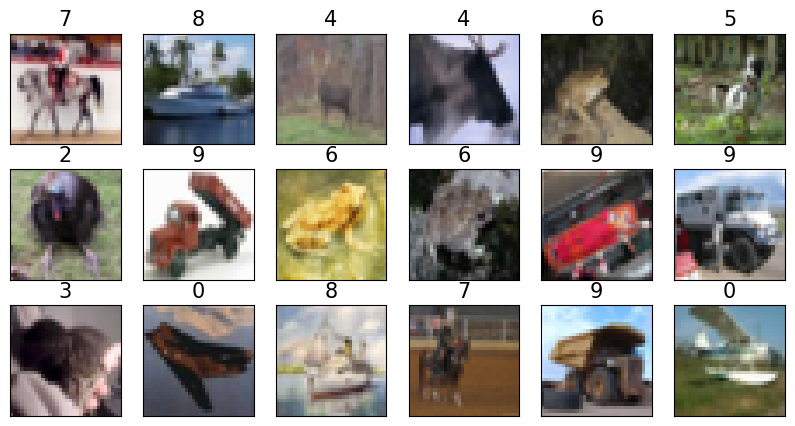

In [ ]:
fig = plt.figure(figsize=(10, 5))
for i in range(len(example["label"])):
  print(example["image"][i].shape, example["label"][i].numpy())

  ax = fig.add_subplot(3, 6, i+1)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.imshow(example["image"][i])
  ax.set_title('{}'.format(example["label"][i].numpy()), size=15)